In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from utils import *

import pandas as pd
from gaussian_process_models.experiments import exp1, exp2, exp3

from building_availability_matrices.utils import (
    NO_CLIENTS,
    CORR,
    UNCORR,
    CORR_FT,
    UNCORR_FT,
)

In [2]:
# Number of FL training rounds:
n_rounds = 100

# Common carbon budget
global_carbon_budget = 7 # kgCO2e

# Uniform carbon budget
carbon_budget = 1 # kgCO2eq

# list of countries/clients:
countries = [i+1 for i in range(NO_CLIENTS)]

main_folder = 'availability_matrices/av-mat-4'

formatted_array = list(range(n_rounds))

In [3]:
res = exp1(freq1=0.25, k=10, seq_len=n_rounds, n_clients=NO_CLIENTS)

2024-10-16 16:51:00.774625: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-16 16:51:00.786343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 16:51:00.800241: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 16:51:00.804422: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 16:51:00.814408: I tensorflow/core/platform/cpu_feature_guar

In [4]:
# Correlated case

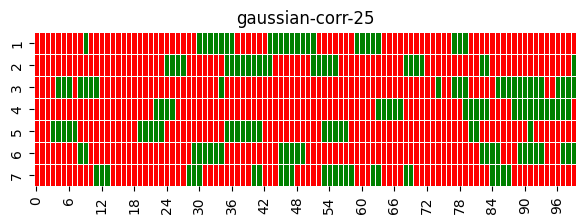

In [5]:
res_corr = res[CORR]
folder = main_folder
key_word = 'gaussian-corr-25'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

In [6]:
from utils import lambda_2

In [7]:
print(list(lambda_2(seq=seq) for seq in res_corr))

[0.7324324324324325, 0.7116666666666667, 0.6566666666666667, 0.7859459459459459, 0.6789189189189191, 0.7116666666666667, 0.5718918918918918]


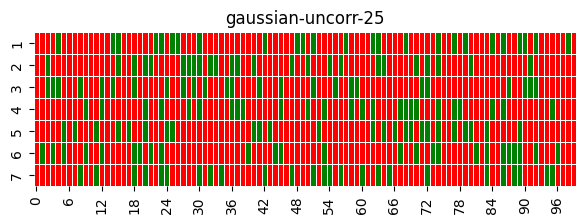

In [8]:
res_corr = res[UNCORR]
folder = main_folder
key_word = 'gaussian-uncorr-25'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

In [9]:
print(list(lambda_2(seq=seq) for seq in res_corr))

[-0.016756756756756808, 0.036756756756756825, 0.036756756756756825, -0.016756756756756808, -0.07027027027027022, -0.016756756756756808, -0.12378378378378374]


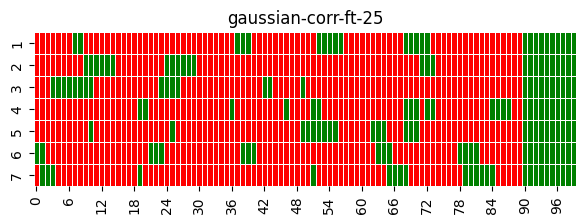

In [10]:
res_corr = res[CORR_FT]
folder = main_folder
key_word = 'gaussian-corr-ft-25'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

In [11]:
print(list(lambda_2(seq=seq) for seq in res_corr))

[0.7666666666666666, 0.8216666666666668, 0.7666666666666666, 0.6016666666666666, 0.7116666666666667, 0.7250000000000001, 0.7116666666666667]


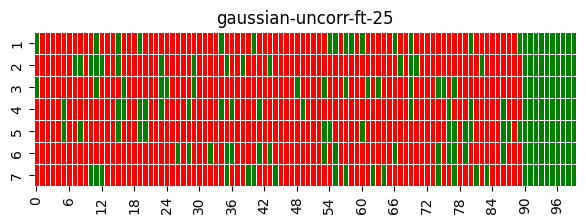

In [12]:
res_corr = res[UNCORR_FT]
folder = main_folder
key_word = 'gaussian-uncorr-ft-25'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

In [13]:
print(list(lambda_2(seq=seq) for seq in res_corr))

[0.33999999999999986, 0.3816666666666666, 0.2849999999999999, 0.2716666666666667, 0.4916666666666667, 0.2716666666666667, 0.32666666666666666]


# Experiment 2

In [14]:
freq_seq = np.array([0.25, 0.3, 0.35, 0.2, 0.5, 0.25, 0.4])

In [15]:
res = exp2(freq_seq=freq_seq, k=10, seq_len=100, n_clients=NO_CLIENTS)

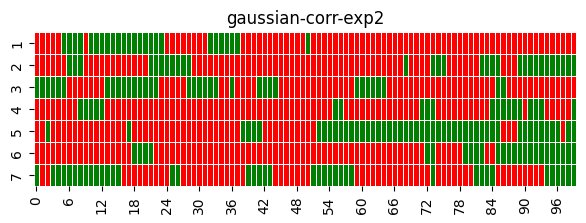

In [16]:
tmp = res[CORR]
folder = main_folder
key_word = 'gaussian-corr-exp2'

availability_matrix = pd.DataFrame(tmp, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

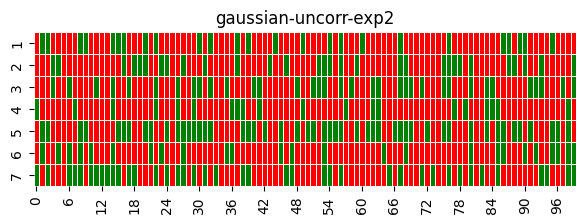

In [17]:
tmp = res[UNCORR]
folder = main_folder
key_word = 'gaussian-uncorr-exp2'

availability_matrix = pd.DataFrame(tmp, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

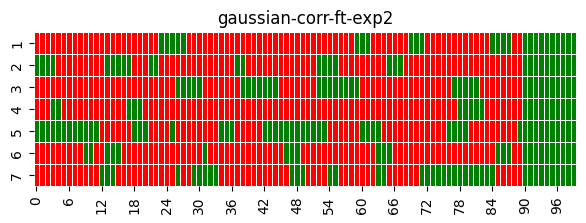

In [18]:
tmp = res[CORR_FT]
folder = main_folder
key_word = 'gaussian-corr-ft-exp2'

availability_matrix = pd.DataFrame(tmp, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

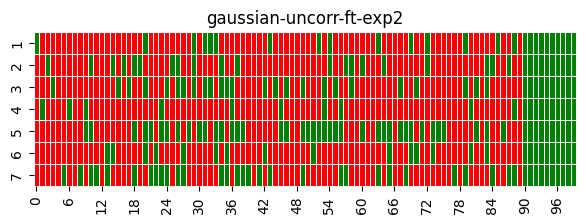

In [19]:
tmp = res[UNCORR_FT]
folder = main_folder
key_word = 'gaussian-uncorr-ft-exp2'

availability_matrix = pd.DataFrame(tmp, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

## Experiment 3

In [20]:
meafns = {
    "C0":np.array([0 for _ in range(25)] + [1 for _ in range(50)] + [0 for _ in range(25)]),
    "C1":np.array([0 for _ in range(50)] + [1 for _ in range(50)]),
    "C2":np.array([0 for _ in range(25)] + [1 for _ in range(50)] + [0 for _ in range(25)]),
    "C3":np.array([0 for _ in range(25)] + [1 for _ in range(50)] + [0 for _ in range(25)]),
    "C4":np.array([1 for _ in range(50)] + [0 for _ in range(50)]),
    "C5":np.array([0.5 for _ in range(50)] + [1.5 for _ in range(50)]),
    "C6":np.array([0.5 for _ in range(100)]),
          }

##### Plotting realisation of GPs for the above mean functions and (i) Correlated case and (ii) Uncorrelated case

In [21]:
from gaussian_process_models.utils import get_cov_mat
xlim = (-3, 3)
x = np.expand_dims(np.linspace(*xlim, 100), 1)
corr_cov = get_cov_mat(
        x=x,
        periodic_length_scale=1.0,
        period=1.0,
        amplitude=0.15,
        local_length_scale=1.0,
    )
uncorr_cov = get_cov_mat(
        x=x,
        periodic_length_scale=1.0,
        period=1.0,
        amplitude=0.15,
        local_length_scale=0.01,
    )

In [22]:
y_corr = np.array([np.random.multivariate_normal(mean=meafns[_], cov=corr_cov, size=10) for _ in meafns.keys()])
y_uncorr = np.array([np.random.multivariate_normal(mean=meafns[_], cov=uncorr_cov, size=10) for _ in meafns.keys()])

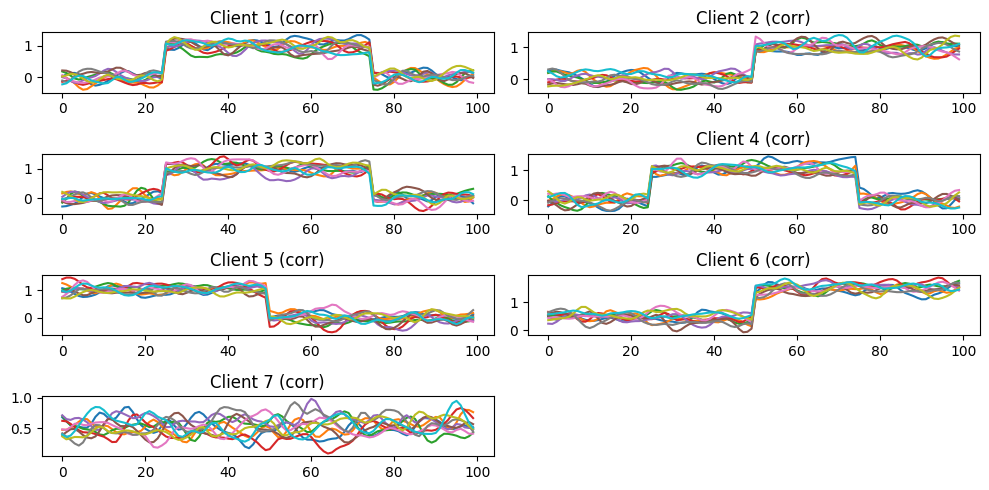

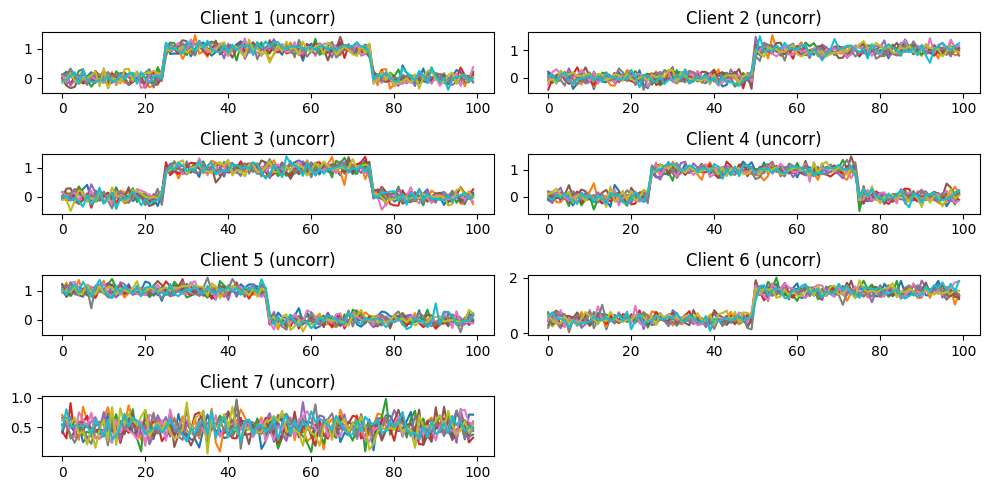

In [23]:
n_rows = NO_CLIENTS // 2 + NO_CLIENTS % 2  # Adjust for an odd number of clients
n_cols = 2

# Plot for y_corr
fig_corr, axes_corr = plt.subplots(n_rows, n_cols, figsize=(10, 5))
axes_corr = axes_corr.ravel()

for i in range(NO_CLIENTS):
    for _ in range(10):
        axes_corr[i].plot(y_corr[i, _,:])
    axes_corr[i].set_title(f"Client {i + 1} (corr)")
    
# Hide empty subplots if NO_CLIENTS is odd
for i in range(NO_CLIENTS, len(axes_corr)):
    axes_corr[i].axis('off')

plt.tight_layout()
plt.show()

# Plot for y_uncorr
fig_uncorr, axes_uncorr = plt.subplots(n_rows, n_cols, figsize=(10, 5))
axes_uncorr = axes_uncorr.ravel()

for i in range(NO_CLIENTS):
    for _ in range(10):
        axes_uncorr[i].plot(y_uncorr[i, _,:])
    axes_uncorr[i].set_title(f"Client {i + 1} (uncorr)")
    
# Hide empty subplots if NO_CLIENTS is odd
for i in range(NO_CLIENTS, len(axes_uncorr)):
    axes_uncorr[i].axis('off')

plt.tight_layout()
plt.show()

##### Experiments

In [24]:
res = exp3(freq1=0.5, mean_seq=meafns, k=10, seq_len=100, n_clients=NO_CLIENTS)

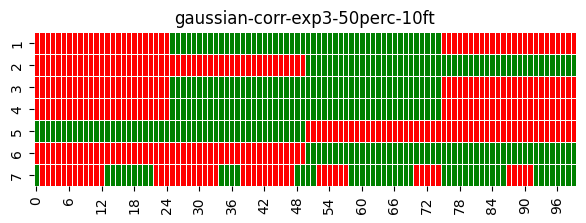

In [25]:
tmp = res[CORR]
folder = main_folder
key_word = 'gaussian-corr-exp3-50perc-10ft'

availability_matrix = pd.DataFrame(tmp, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

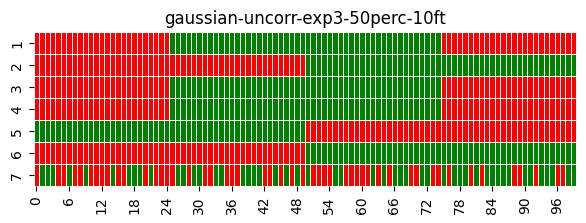

In [26]:
tmp = res[UNCORR]
folder = main_folder
key_word = 'gaussian-uncorr-exp3-50perc-10ft'

availability_matrix = pd.DataFrame(tmp, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

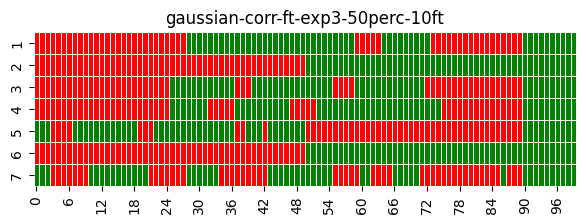

In [27]:
tmp = res[CORR_FT]
folder = main_folder
key_word = 'gaussian-corr-ft-exp3-50perc-10ft'

availability_matrix = pd.DataFrame(tmp, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

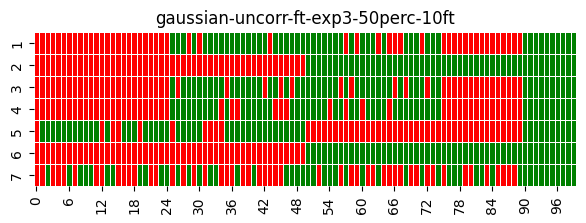

In [28]:
tmp = res[UNCORR_FT]
folder = main_folder
key_word = 'gaussian-uncorr-ft-exp3-50perc-10ft'

availability_matrix = pd.DataFrame(tmp, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)